In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
# загружаем данные
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Work/model.csv')
df.sample(7)

,Unnamed: 0,year,month,day,heigh,rainy,date,week,heigh_9403,rainy_9403,...,heigh_9417,rainy_9417,heigh_9419,rainy_9419,heigh_9420,rainy_9420,heigh_9422,rainy_9422,heigh_9518,rainy_9518
1816,1816,2012,9,30,655.0,43,2012-09-30,39.0,75.0,31,...,55.0,46,324.0,56,221.0,25,260.0,28,104.0,23
2976,2976,2016,7,5,616.0,6,2016-07-05,27.0,333.0,1,...,140.0,3,331.0,57,211.0,43,236.0,7,230.0,2
3335,3335,2017,12,4,688.0,43,2017-12-04,49.0,49.0,52,...,27.0,46,344.0,56,175.0,49,244.0,38,64.0,31
1595,1595,2012,3,12,564.0,6,2012-03-12,11.0,99.0,13,...,50.0,40,305.0,17,192.0,1,282.0,12,102.0,27
352,352,2008,6,30,1191.0,32,2008-06-30,27.0,69.0,63,...,82.0,46,588.0,45,235.0,49,295.0,22,121.0,23
2643,2643,2015,3,8,1.0,43,2015-03-08,10.0,1.0,52,...,1.0,46,1.0,56,1.0,49,1.0,28,1.0,31
3537,3537,2017,10,21,850.0,14,2017-10-21,42.0,53.0,52,...,21.0,46,402.0,56,165.0,49,243.0,28,60.0,23


In [4]:
df.shape

(3653, 34)

In [4]:
df_s = df.copy() #для аримы

In [7]:
df = df.drop(['Unnamed: 0', 'date'], axis=1);

In [ ]:
#df.info()

Построение всяко-разных моделей

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [9]:
df.columns

Index(['year', 'month', 'day', 'heigh', 'rainy', 'week', 'heigh_9403',
       'rainy_9403', 'heigh_9404', 'rainy_9404', 'heigh_9405', 'rainy_9405',
       'heigh_9406', 'rainy_9406', 'heigh_9408', 'rainy_9408', 'heigh_9410',
       'rainy_9410', 'heigh_9413', 'rainy_9413', 'heigh_9416', 'rainy_9416',
       'heigh_9417', 'rainy_9417', 'heigh_9419', 'rainy_9419', 'heigh_9420',
       'rainy_9420', 'heigh_9422', 'rainy_9422', 'heigh_9518', 'rainy_9518'],
      dtype='object')

In [10]:
X = df.drop(['heigh'], axis=1)
y = df[['heigh']]

In [11]:
X.shape, y.shape

((3653, 31), (3653, 1))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

модели

In [15]:
models = pd.DataFrame(columns=['Model', 'MSE', 'R2 score'])

In [16]:
lasso = Lasso()
ridge = Ridge()
lasso_cv = LassoCV()
ridge_cv = RidgeCV()
lr = LinearRegression() 
knr = KNeighborsRegressor(n_neighbors=7)
rfr = RandomForestRegressor()
sgd = SGDRegressor()

In [17]:
def train_predict_report(model, model_name):
  model.fit(X_train_scaled, y_train)

  y_pred = model.predict(X_test_scaled)

  models.loc[len(models)] = [model_name,
                             mean_squared_error(y_test, model.predict(X_test_scaled)),
                             model.score(X_test_scaled, y_test).round(3)]

In [18]:
list_models = [[lasso, 'Lasso'], [ridge, 'Ridge'], [lasso_cv, 'LassoCV'],
              [ridge_cv, 'RidgeCV'], [lr, 'LinearRegression'],
              [knr, 'KNeighborsRegressor'], [rfr, 'RandomForestRegressor'],
               [sgd, 'SGDRegressor']]
for model in list_models:
  train_predict_report(model[0], model[1])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-17-a58c0e1797a5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
models

,Model,MSE,R2 score
0,Lasso,24359.857134,0.911
1,Ridge,24118.411586,0.912
2,LassoCV,24181.786752,0.912
3,RidgeCV,24184.244571,0.912
4,LinearRegression,24111.252704,0.912
5,KNeighborsRegressor,15812.758268,0.942
6,RandomForestRegressor,7459.402239,0.973
7,SGDRegressor,23868.014765,0.913


In [20]:
rfr_params = {'n_estimators': [50, 100, 200],
             'max_depth': [None, 5, 10],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'max_features': ['sqrt', 'log2'],
             'bootstrap': [True, False],
             'oob_score': [True, False]}
GSCV = GridSearchCV(rfr, rfr_params, n_jobs=-1, cv=5)
GSCV.fit(X_train_scaled, y_train)
GSCV.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': False}

In [21]:
rfr_result = GSCV.best_estimator_
print(f'R2: {rfr_result.score(X_test_scaled, y_test).round(3)}')

R2: 0.977


# Попытка построить модель ARIMA

#I этап
##Идентификация модели ARIMA(p, d, q).

Код взят с сайта https://pythonpip.ru/examples/model-arima-v-python

In [5]:
df_s.head()

,Unnamed: 0,year,month,day,heigh,rainy,date,week,heigh_9403,rainy_9403,...,heigh_9417,rainy_9417,heigh_9419,rainy_9419,heigh_9420,rainy_9420,heigh_9422,rainy_9422,heigh_9518,rainy_9518
0,0,2008,1,1,964.0,22,2008-01-01,1.0,76.0,45,...,46.0,40,315.0,33,178.0,20,343.0,14,125.0,27
1,1,2008,2,1,795.0,17,2008-02-01,5.0,78.0,13,...,56.0,40,296.0,33,177.0,1,309.0,12,134.0,27
2,2,2008,3,1,709.0,17,2008-03-01,9.0,78.0,45,...,62.0,40,295.0,48,177.0,43,293.0,12,142.0,27
3,3,2008,4,1,694.0,17,2008-04-01,14.0,79.0,45,...,66.0,40,298.0,17,178.0,1,284.0,12,160.0,0
4,4,2008,5,1,686.0,35,2008-05-01,18.0,87.0,46,...,73.0,40,298.0,17,179.0,43,276.0,7,160.0,27


In [6]:
df_s = df_s.drop(['Unnamed: 0'], axis=1);

Нулевая гипотеза расширенного теста Дики-Фуллера (ADF) заключается в том, что временной ряд не является стационарным. Таким образом, если p-значение теста ADF меньше уровня значимости (0,05), то мы отвергнем нулевую гипотезу и сделаем вывод, что временной ряд определенно стационарен.

In [7]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
 
res = adfuller( df_s.heigh.dropna()) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1]) 

Augmented Dickey-Fuller Statistic: -2.597768
p-value: 0.093460


ADF = -2.597768 показывает, насколько сильно временной ряд отклоняется от стационарности. Для выборки размером 3000 критическое значение ADF при уровне значимости 0.95 составляет -3.432. То есть нельзя сделать вывод о стационарности временного ряда, так как ADF больше критического значения. Необходимо проводить дополнительные исследования для определения стационарности ряда.

p-value = 0.093460, а это означает, что вероятность получить такое же или более экстремальное значение статистики, если ряд на самом деле нестационарен, большая. В данном случае мы можем с уверенностью сказать, что ряд не стационарен.

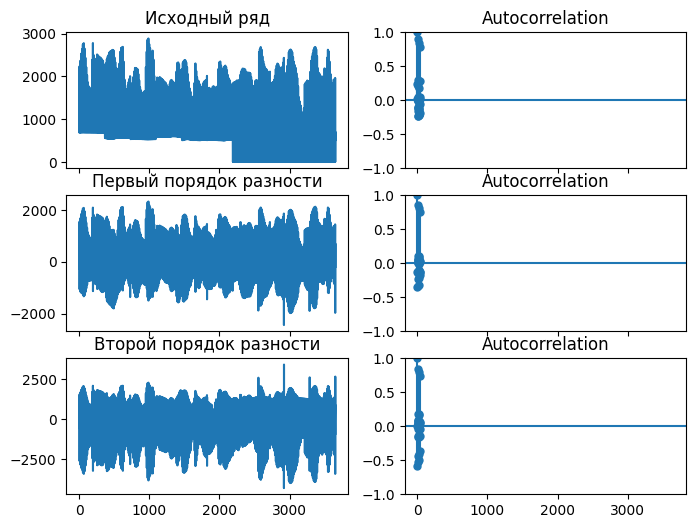

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
fig, axes = plt.subplots(3, 2, figsize=(8, 6), sharex = True)
axes[0, 0].plot(df_s.heigh); axes[0, 0].set_title('Исходный ряд') 
plot_acf(df_s.heigh, ax = axes[0, 1]) 
  
axes[1, 0].plot(df_s.heigh.diff()); axes[1, 0].set_title('Первый порядок разности') 
plot_acf(df_s.heigh.diff().dropna(), ax = axes[1, 1]) 
  
axes[2, 0].plot(df_s.heigh.diff().diff()); axes[2, 0].set_title('Второй порядок разности') 
plot_acf(df_s.heigh.diff().diff().dropna(), ax = axes[2, 1]) 
 
plt.show();

In [12]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.8 MB/s eta 0:00:00


In [13]:
from pmdarima.arima.utils import ndiffs 
 
X = df_s.heigh 
 
# Augmented Dickey Fuller Test 
adftest = ndiffs(X, test = 'adf') 
 
# KPSS Test 
kpsstest = ndiffs(X, test = 'kpss') 
 
# PP Test 
pptest = ndiffs(X, test = 'pp') 
 
print("ADF Test =", adftest) 
print("KPSS Test =", kpsstest) 
print("PP Test =", pptest) 

ADF Test = 0
KPSS Test = 1
PP Test = 0


Эти параметры относятся к статистическим тестам на стационарность временного ряда. 

ADF = 0, что означает, что нулевая гипотеза о наличии единичного корня может быть отвергнута на заданном уровне значимости, что говорит о стационарности ряда.

KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test, наоборот, является тестом на отсутствие стационарности. Значение теста равно 1, это означает, что нулевая гипотеза об отсутствии тренда и сезонности в ряду не может быть отвергнута на заданном уровне значимости, что говорит о нестационарности ряда.

Таким образом, значения ADF Test = 0 и PP Test = 0 указывают на стационарность ряда, а значение KPSS Test = 1 указывает на нестационарность ряда.

Если ряд нестационарен по тесту Дики-Фуллера и KPSS=1, то это говорит о том, что ряд не может быть использован для анализа временных рядов. Также это может указывать на наличие тренда или сезонности, что может привести к ошибкам при моделировании и прогнозировании.

## Построение модели ARIMA
После того, как мы определили значения p, q и d, мы попытаемся создать модель ARIMA. Реализация модуля ARIMA() показана ниже:

In [19]:
from statsmodels.tsa.arima.model import ARIMA 

# Creating ARMA model 
mymodel = ARIMA(df_s.heigh, order =(2, 3, 1)) 
modelfit = mymodel.fit() 
print(modelfit.summary()) 

                               SARIMAX Results                                
Dep. Variable:                  heigh   No. Observations:                 3653
Model:                 ARIMA(2, 3, 1)   Log Likelihood              -29151.891
Date:                Thu, 01 Jun 2023   AIC                          58311.783
Time:                        14:06:10   BIC                          58336.593
Sample:                             0   HQIC                         58320.618
                               - 3653                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8663      0.012    -71.660      0.000      -0.890      -0.843
ar.L2         -0.4921      0.019    -26.255      0.000      -0.529      -0.455
ma.L1         -1.0000      0.021    -47.914      0.0

Данные числа говорят о том, что ряд вероятно нестационарен, так как значение Q-статистики (123.46) значительно превышает критическое значение, а также о том, что имеется нарушение нормальности распределения (высокое значение JB-статистики). Также заметно наличие гетероскедастичности (значение H-статистики выше 1). Это может потребовать проведения дополнительного анализа данных и применения соответствующих методов для приведения ряда к стационарному виду.

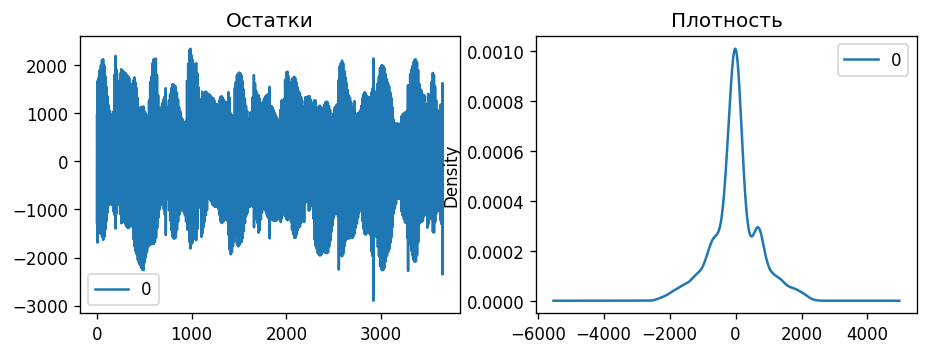

In [20]:
plt.rcParams.update({'figure.figsize' :(9,3), 'figure.dpi' : 120}) 
 
# Plotting Residual Errors 
myresiduals = pd.DataFrame(modelfit.resid) 
fig, ax = plt.subplots(1,2) 
myresiduals.plot(title = "Остатки", ax = ax[0]) 
myresiduals.plot(kind = 'kde', title = 'Плотность', ax = ax[1]) 
plt.show()